# Let's now evaluate all of our models on test data

## First, we import everything


In [1]:
from Nets.Training import *
from Core.LoadTrainingData import *
from Core.Misc import kbToPx , normalize_local
import  numpy as np, matplotlib.pyplot as plt


## We now define the necessary paths to all files: experimentally acquiered optical maps and the models folder. For example, let's run our E.coli dataset through the ensemble of our trained networks.

In [2]:
data_to_analyse = 'Data\measured\EColi\segmentation-results.hdf5'
cnn_folder      = 'Models\PaperModels'
output_path     = 'Data\output'


## Loading all the data and applying local normalization and rescaling...


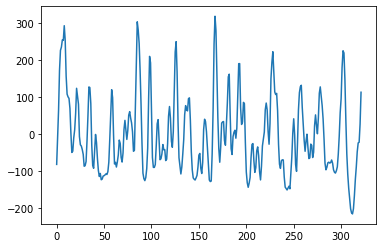

In [4]:

data_loader = ExperimentalData()
x_data = []

for data in data_loader.load_experimental_data(data_to_analyse):
	pixel_local_window = kbToPx(10000,[1.72,0.34,78.6])
	data = normalize_local(pixel_local_window, data)
	x_data.append(data*100)

plt.plot(x_data[np.random.randint(0,len(x_data))])

## Now that we have our data loaded, we can evaluate the models on it and store the raw score result in out.csv in the output_path. 

In [5]:
evaluation_tp = Evaluation()
evaluation_tp.eval_models(cnn_folder,output_path,x_data)



## Let's plot the statistics for these results at 1%  FP rate... (since the number of traces is discrete, it can differ by +-0.2%)

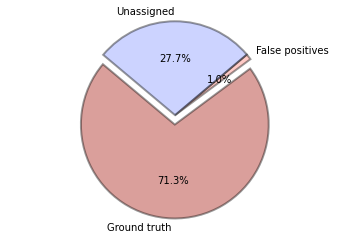

In [6]:
evaluation_tp.eval_statistics(fp_val=0.01)
evaluation_tp.get_statistics('E.coli')

## ... and compare it to cross-correlation!

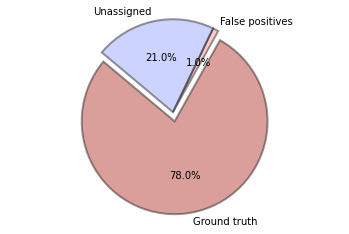

In [7]:
evaluation_xcorr = Evaluation()
evaluation_xcorr.load_xcorr_data('Data/measured/EColi/xcorr_results.csv')
evaluation_xcorr.eval_statistics(fp_val=0.01)
evaluation_xcorr.get_statistics('E.coli')

## Now, let's analyze more complex datasets, with the CNN's, and compare results to x-corr, using the threshold determined above:

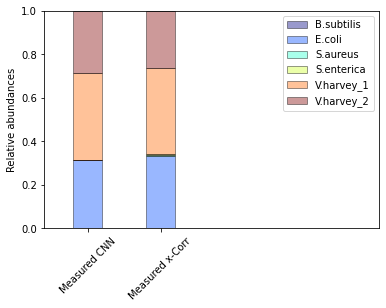

In [12]:
mix_path = 'Data\measured\MixVibrioEColi\segmentation-results.hdf5'
xcorr_results = 'Data/xcorr/xcorr_mixvibrio_ecoli.csv'

# Load the mixture data and evaluate models for CNN's 
x_data = []
for data in data_loader.load_experimental_data(mix_path):
	pixel_local_window = kbToPx(10000,[1.72,0.34,78.6])
	data = normalize_local(pixel_local_window, data)
	x_data.append(data*100)


evaluation_tp.eval_models(cnn_folder,output_path,x_data)
evaluation_tp.get_abundance()


# Plot the relative abundances for CNN's
colors = iter(plt.cm.jet(np.linspace(0,1,len(evaluation_tp.genomes))))
plotted_bottom = 0

for key in evaluation_tp.abundances.keys():
    c = next(colors)
    plt.bar(1,evaluation_tp.abundances[key][0],bottom=plotted_bottom,edgecolor='black',lw=1,color = c,alpha=0.4,width=0.2,label=key)
    plotted_bottom+=evaluation_tp.abundances[key][0]
    plt.xlim([0.7,3])

# Load the mixture data for x-corr and evaluate models for cross correlation

evaluation_xcorr.load_xcorr_data(xcorr_results)
evaluation_xcorr.get_abundance()
plotted_bottom = 0
colors = iter(plt.cm.jet(np.linspace(0,1,len(evaluation_xcorr.genomes))))


# Plot the relative abundances for x-corr, next to the CNN's

for key in evaluation_xcorr.abundances.keys():
    c = next(colors)
    plt.bar(1.5,evaluation_xcorr.abundances[key][0],bottom=plotted_bottom,edgecolor='black',lw=1,color = c,alpha=0.4,width=0.2,label='_nolabel_')
    plotted_bottom+=evaluation_xcorr.abundances[key][0]
    plt.xlim([0.7,3])


plt.xticks([1, 1.5])
ax = plt.gca()
ax.set_xticklabels(['Measured CNN', 'Measured x-Corr'],rotation=45)

plt.ylim([0,1])
plt.ylabel('Relative abundances')
plt.legend()
plt.show()